In [37]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from decisiontree import DecisionTreeClassifier
from randomforest import RandomForestClassifier

## DecisionTree

Дерево строится по алгоритму C4.5

В ходе построения дерева ветвление происходит следующим образом:
* Разбиваем выборку по определенному критерию (я разбивал по порогу для каждого признака, получая $n\_features*n\_samples$ разбиений
* Критерием для выбора наилучшего разделения являлся [information gain](https://en.wikipedia.org/wiki/Information_gain_ratio) $IG(Ex,a)=H(Ex) -\sum_{v\in values(a)} \left(\frac{|\{x\in Ex|value(x,a)=v\}|}{|Ex|} \cdot H(\{x\in Ex|value(x,a)=v\})\right)$
* Ветвь дерева становится листом, если в разбиении остались примеры только одно класса

Для начала проверим корректность построения одного дерева. Возьмем какую-нибудь логическую функцию, к примеру, XOR:

In [30]:
X = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1]
]).T
y = np.array([0, 1, 1, 0])

xor = DecisionTreeClassifier()
xor.fit(X, y)

Построим таблицу истинности с помощью дерева

In [31]:
X_test = np.random.permutation(X)
y_test = xor.predict(X_test)
truth_table = np.hstack([X_test, y_test[:, np.newaxis]]).tolist()
print(*truth_table, sep='\n')

[0, 1, 1]
[0, 0, 0]
[1, 1, 0]
[1, 0, 1]


И посмотрим само построенное дерево

In [32]:
print(xor)

x0 > 0.0
	x1 > 0.0
		0
		1
	x1 > 0.0
		1
		0



## RandomForest
Случайный лес работает следующим образом:
* Строим n решающих деревьев, каждое подмножестве признаков
* Аггрегируем ответ голосованием

Проверим работу RandomForestClassifier на двух выборках:
1. Выборка #1: 1000 примеров с 10 признаками. 8 из этих признаков содержат информацию
2. Выборка #2: 1000 примеров с 10 признаками. 2 из этих признаков содержат информацию

**Предположение**:
В выборке #1 будет важно количество решающих деревьев; В выборке #2 количество качество не будет зависеть от количества решающих деревьев

Выборка #1

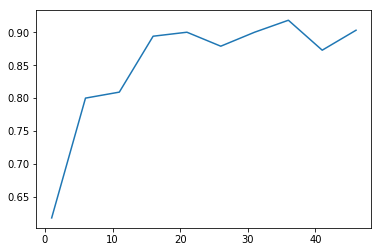

In [42]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_classes=2, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

accuracy = []
n_estimators = np.arange(1, 50, 5)
for i in n_estimators:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.plot(n_estimators, accuracy)

Выборка #2

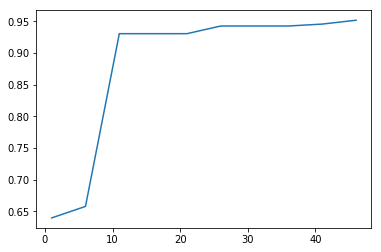

In [43]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=2, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

accuracy = []
n_estimators = np.arange(1, 50, 5)
for i in n_estimators:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.plot(n_estimators, accuracy)